In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns 

# Fire Size (Regression)

In [7]:
filename = "Updated Fire Data - First 10k.csv"
dataset = pd.read_csv(filename)
targetFeatures = ["FIRE_SIZE"]
inputFeatures = ["FIRE_YEAR", "DISCOVERY_DOY", "LATITUDE", "LONGITUDE", "DURATION_HOURS", "Precipitation_In_Month", "Avg_Temp_In_Month"]

# Drop NaN values from columns in targetFeatures and inputFeatures
dataset.dropna(subset=targetFeatures + inputFeatures, inplace=True)

c:\Users\owenh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


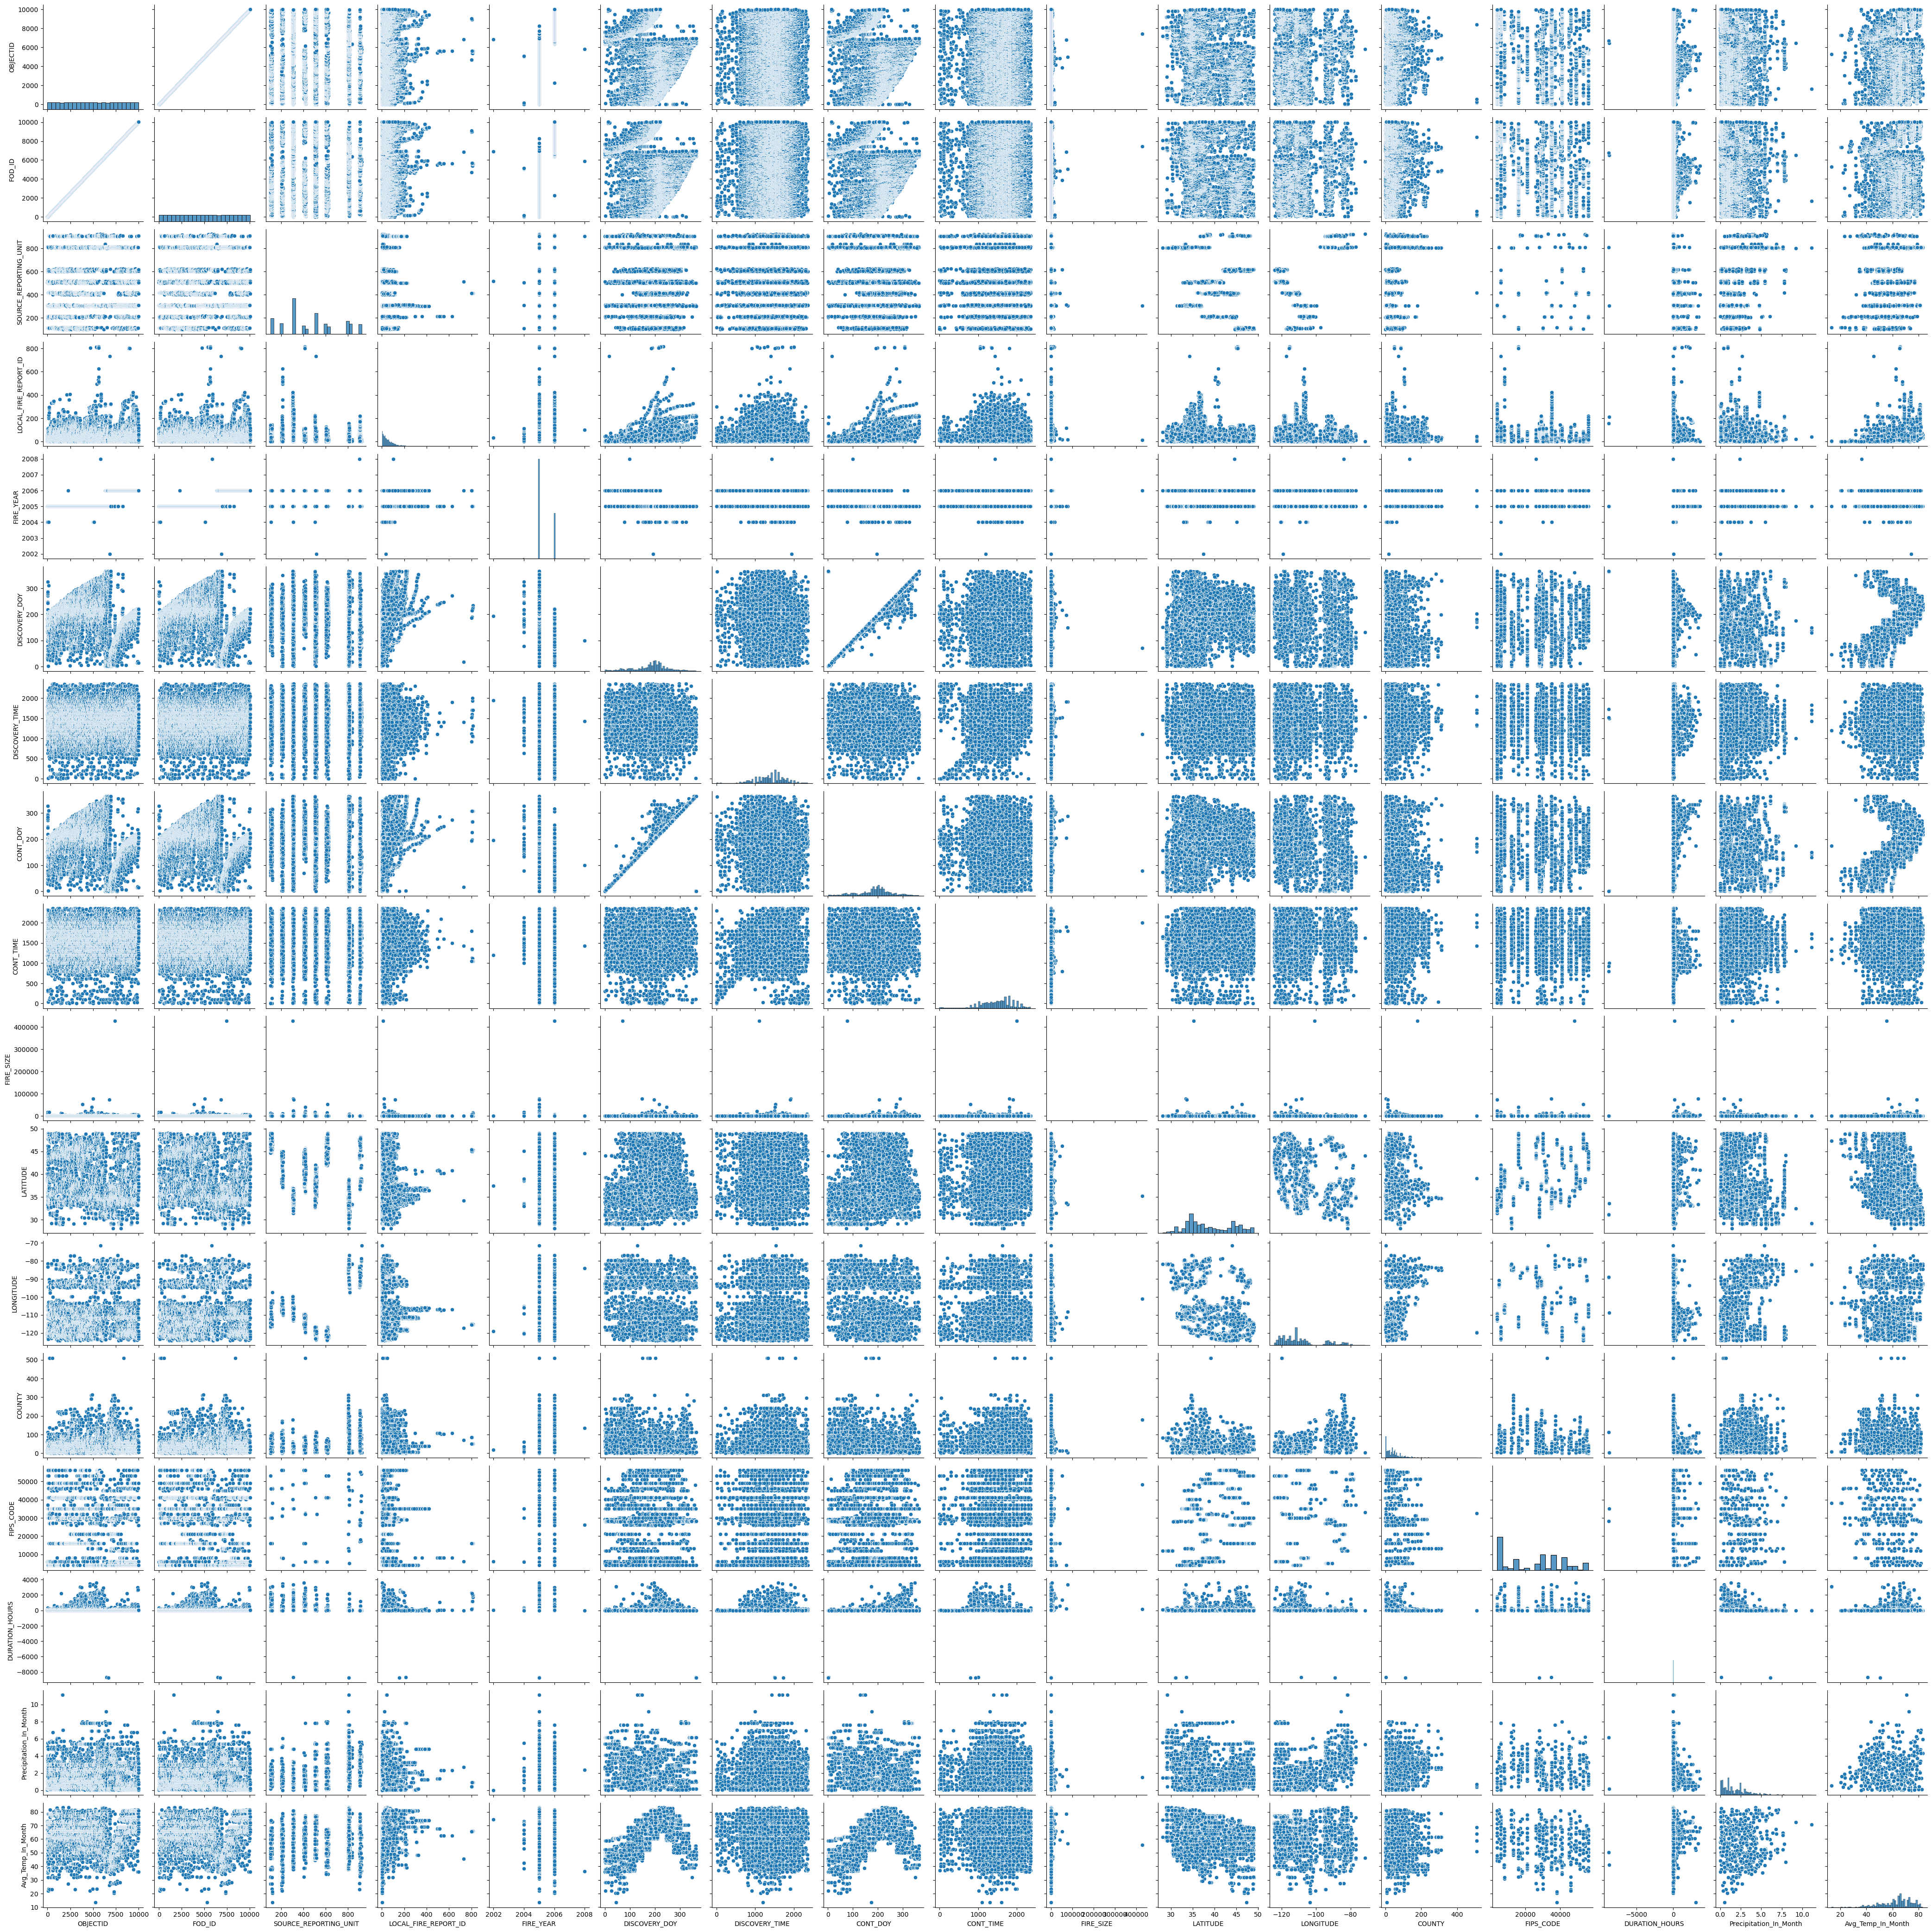

In [5]:
sns.pairplot(dataset)

In [8]:
X = dataset[inputFeatures]
y = dataset[targetFeatures]

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

y_rescaled = scaler.fit_transform(y)
y = pd.DataFrame(data = y_rescaled, columns = y.columns)

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Pre-processed data :
      FIRE_YEAR  DISCOVERY_DOY  LATITUDE  LONGITUDE  DURATION_HOURS  \
0      0.500000       0.087912  0.570735   0.061803        0.709058   
1      0.333333       0.362637  0.517857   0.073188        0.709241   
2      0.333333       0.414835  0.520305   0.066920        0.708779   
3      0.333333       0.491758  0.499947   0.082486        0.718258   
4      0.333333       0.491758  0.499947   0.082113        0.718096   
...         ...            ...       ...        ...             ...   
9919   0.666667       0.598901  0.629521   0.019221        0.710180   
9920   0.666667       0.596154  0.680909   0.061230        0.708714   
9921   0.666667       0.557692  0.723727   0.038695        0.714147   
9922   0.666667       0.601648  0.623466   0.018638        0.714651   
9923   0.666667       0.557692  0.727373   0.038732        0.712084   

      Precipitation_In_Month  Avg_Temp_In_Month  
0                   0.332130           0.461318  
1                   0.0063

In [14]:
data_train, data_test, size_train, size_test = train_test_split(X, y, test_size=0.3)

mlp = MLPRegressor(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.4, batch_size = 10, hidden_layer_sizes = (10, 25, 15, 10, 5), max_iter = 300)

mlp.fit(data_train, np.ravel(size_train))

pred = mlp.predict(data_test)
pred

array([-2.85950841e-05, -2.85974788e-05, -2.88431286e-05, ...,
       -2.91459932e-05, -2.86956744e-05, -2.86761457e-05])

In [15]:
mse = mean_squared_error(size_test,pred)
print("Mean Square Error : ", mse)
rmse = np.sqrt(mse)
r2 = r2_score(size_test,pred)
print('RMSE: %8.15f' % rmse)
print('R2: %8.15f' % r2)

Mean Square Error :  2.4430850702462285e-06
RMSE: 0.001563037130156
R2: -0.012373103153215


In [16]:
CV = cross_validate(mlp, X, np.ravel(y), cv=7 , scoring=['neg_mean_squared_error'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

MSE
[2.36531575e-06 1.20034937e-06 1.31206081e-05 3.56436709e-05
 2.18243011e-05 1.83061066e-03 1.02443205e-03]
Average MSE =  0.0004184567072996044


In [12]:
max_iterations = [300,500,800,1000]
hidden_layer_siz = [(25, 15), (25, 15, 10), (25,15,10,5), (10,25,15,10),(10,25,15,10,5),(30,25,15,10,5)]
learning_rates = 0.1 * np.arange(1, 5)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X,np.ravel(y))

GridSearchCV(estimator=MLPRegressor(activation='logistic', batch_size=10,
                                    hidden_layer_sizes=(25, 15, 10),
                                    learning_rate_init=0.4, max_iter=300,
                                    random_state=42, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(25, 15), (25, 15, 10),
                                                (25, 15, 10, 5),
                                                (10, 25, 15, 10),
                                                (10, 25, 15, 10, 5),
                                                (30, 25, 15, 10, 5)],
                         'learning_rate_init': array([0.1, 0.2, 0.3, 0.4]),
                         'max_iter': [300, 500, 800, 1000]})

In [13]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'hidden_layer_sizes': (10, 25, 15, 10, 5), 'learning_rate_init': 0.4, 'max_iter': 300}
Optimal Accuracy :  -0.003265664388775025


# Fire Size Class (MLP Classifier)

In [11]:
filename = "Updated Fire Data - First 10k.csv"
dataset = pd.read_csv(filename)

targetFeatures = ["FIRE_SIZE_CLASS"]
inputFeatures = ["FIRE_YEAR", "DISCOVERY_DOY", "LATITUDE", "LONGITUDE", "DURATION_HOURS", "Precipitation_In_Month", "Avg_Temp_In_Month"]

# Drop NaN values from columns in targetFeatures and inputFeatures
dataset.dropna(subset=targetFeatures + inputFeatures, inplace=True)

X = dataset[inputFeatures]
y = dataset[targetFeatures]

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
encoder = OneHotEncoder(categories=categories, sparse=False)
y = encoder.fit_transform(y.values.reshape(-1,1))

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Pre-processed data :
      FIRE_YEAR  DISCOVERY_DOY  LATITUDE  LONGITUDE  DURATION_HOURS  \
0      0.500000       0.087912  0.570735   0.061803        0.709058   
1      0.333333       0.362637  0.517857   0.073188        0.709241   
2      0.333333       0.414835  0.520305   0.066920        0.708779   
3      0.333333       0.491758  0.499947   0.082486        0.718258   
4      0.333333       0.491758  0.499947   0.082113        0.718096   
...         ...            ...       ...        ...             ...   
9919   0.666667       0.598901  0.629521   0.019221        0.710180   
9920   0.666667       0.596154  0.680909   0.061230        0.708714   
9921   0.666667       0.557692  0.723727   0.038695        0.714147   
9922   0.666667       0.601648  0.623466   0.018638        0.714651   
9923   0.666667       0.557692  0.727373   0.038732        0.712084   

      Precipitation_In_Month  Avg_Temp_In_Month  
0                   0.332130           0.461318  
1                   0.0063

c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.4, batch_size = 10, hidden_layer_sizes = (25, 15, 10), max_iter = 300)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [13]:
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
#print(multilabel_confusion_matrix(class_test, pred))

classNum = 0
for matrix in multilabel_confusion_matrix(class_test, pred):
  print(f"Class: {categories[0][classNum]}")
  classNum += 1

  tn, fp, fn, tp = matrix.ravel()
  print(f"         Actual Positive | Actual Negative")
  print(f"-------------------|-----|----------------")
  print(f"Predicted Positive | {str(tp).rjust(3)} | {str(fp).rjust(3)}")
  print(f"-------------------|-----|----------------")
  print(f"Predicted Negative | {str(fn).rjust(3)} | {str(tn).rjust(3)}")
  print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.6403626595030222
Mean Square Error :  0.09953947999616232
Confusion Matrix for each label : 
Class: A
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive | 1632 | 738
-------------------|-----|----------------
Predicted Negative |  95 | 513
TP: 1632, FP: 738, FN: 95, TN: 513

Class: B
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive | 275 | 266
-------------------|-----|----------------
Predicted Negative | 607 | 1830
TP: 275, FP: 266, FN: 607, TN: 1830

Class: C
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |   0 |   0
-------------------|-----|----------------
Predicted Negative | 251 | 2727
TP: 0, FP: 0, FN: 251, TN: 2727

Class: D
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |   0 |   0
-------------------|-----|----------------
Predicted Negat

c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Using sklearn function cross_validate()

CV = cross_validate(mlp, X, y, cv=7 , scoring=['accuracy', 'neg_mean_squared_error'])
print('Accuracy')
print(CV['test_accuracy'])
print('MSE')
print(-1*CV['test_neg_mean_squared_error'])

print('Average Accuracy = ', sum(CV['test_accuracy']) / len(CV['test_accuracy']))
print('Average MSE = ', sum(-1 * CV['test_neg_mean_squared_error']) / len(CV['test_neg_mean_squared_error']))

Accuracy
[0.65232722 0.65726375 0.651622   0.60860367 0.35472496 0.59139026
 0.70642202]
MSE
[0.089865   0.08623816 0.09500302 0.10709248 0.1190812  0.11493094
 0.07944349]
Average Accuracy =  0.6031934124803006
Average MSE =  0.09880775770746877


In [17]:
max_iterations = [300,500,800,1000]
hidden_layer_siz = [(25, 15, 10), (25,15,10,5), (10,25,15,10),(10,25,15,10,5),(30,25,15,10,5)]
learning_rates = 0.1 * np.arange(1, 5)

param_grid = dict(learning_rate_init = learning_rates, hidden_layer_sizes = hidden_layer_siz, max_iter = max_iterations)

grid = GridSearchCV(estimator = mlp, param_grid = param_grid)

grid.fit(X,y)

GridSearchCV(estimator=MLPClassifier(activation='logistic', batch_size=10,
                                     hidden_layer_sizes=(10, 10),
                                     learning_rate_init=0.2, max_iter=500,
                                     random_state=42, solver='sgd'),
             param_grid={'hidden_layer_sizes': [(25, 15, 10), (25, 15, 10, 5),
                                                (10, 25, 15, 10),
                                                (10, 25, 15, 10, 5),
                                                (30, 25, 15, 10, 5)],
                         'learning_rate_init': array([0.1, 0.2, 0.3, 0.4]),
                         'max_iter': [300, 500, 800, 1000]})

In [20]:
print("Optimal Hyper-parameters : ", grid.best_params_)
print("Optimal Accuracy : ", grid.best_score_)

Optimal Hyper-parameters :  {'hidden_layer_sizes': (25, 15, 10), 'learning_rate_init': 0.4, 'max_iter': 300}
Optimal Accuracy :  0.6288847302348257


# Original Model

In [7]:
filename = "Updated Fire Data Sample - First 100 Only - Sheet1.csv"
dataset = pd.read_csv(filename)

targetFeatures = ["FIRE_SIZE_CLASS"]
inputFeatures = ["FIRE_YEAR", "DISCOVERY_DOY", "DISCOVERY_TIME", "Precipitation_In_Month", "Avg_Temp_In_Month"]

# Drop NaN values from columns in targetFeatures and inputFeatures
dataset.dropna(subset=targetFeatures + inputFeatures, inplace=True)

X = dataset[inputFeatures]
y = dataset[targetFeatures]

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

categories = [['A', 'B', 'C', 'D', 'G']]
encoder = OneHotEncoder(categories=categories, sparse=False)
y = encoder.fit_transform(y.values.reshape(-1,1))

print("Pre-processed data :")
print(X)

print("Pre-processed class :")
print(y)

Pre-processed data :
    FIRE_YEAR  DISCOVERY_DOY  DISCOVERY_TIME  Precipitation_In_Month  \
0         1.0       0.095975        0.588101                0.666055   
1         0.0       0.405573        0.379863                0.003670   
2         0.0       0.464396        0.872311                0.003670   
3         0.0       0.551084        0.725400                0.000000   
4         0.0       0.551084        0.725400                0.000000   
..        ...            ...             ...                     ...   
95        1.0       0.383901        0.517162                0.111927   
96        1.0       0.578947        0.000000                0.042202   
97        1.0       0.495356        0.863158                0.168807   
98        1.0       0.529412        0.826087                0.168807   
99        1.0       0.560372        0.588101                0.216514   

    Avg_Temp_In_Month  
0            0.416961  
1            0.674912  
2            0.674912  
3            0.791

c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.3)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.2, batch_size = 10, hidden_layer_sizes = (10, 10), max_iter = 500)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)
pred

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [9]:
print("Accuracy : ", accuracy_score(class_test, pred))
print("Mean Square Error : ", mean_squared_error(class_test, pred))

print("Confusion Matrix for each label : ")
#print(multilabel_confusion_matrix(class_test, pred))

classNum = 0
for matrix in multilabel_confusion_matrix(class_test, pred):
  print(f"Class: {categories[0][classNum]}")
  classNum += 1

  tn, fp, fn, tp = matrix.ravel()
  print(f"         Actual Positive | Actual Negative")
  print(f"-------------------|-----|----------------")
  print(f"Predicted Positive | {str(tp).rjust(3)} | {str(fp).rjust(3)}")
  print(f"-------------------|-----|----------------")
  print(f"Predicted Negative | {str(fn).rjust(3)} | {str(tn).rjust(3)}")
  print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")

print("Classification Report : ")
print(classification_report(class_test, pred))

Accuracy :  0.5666666666666667
Mean Square Error :  0.12666666666666665
Confusion Matrix for each label : 
Class: A
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |  17 |   4
-------------------|-----|----------------
Predicted Negative |   8 |   1
TP: 17, FP: 4, FN: 8, TN: 1

Class: B
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |   0 |   1
-------------------|-----|----------------
Predicted Negative |   4 |  25
TP: 0, FP: 1, FN: 4, TN: 25

Class: C
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |   0 |   1
-------------------|-----|----------------
Predicted Negative |   0 |  29
TP: 0, FP: 1, FN: 0, TN: 29

Class: D
         Actual Positive | Actual Negative
-------------------|-----|----------------
Predicted Positive |   0 |   0
-------------------|-----|----------------
Predicted Negative |   0 |  30
TP: 0,

c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\owenh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
